In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import random as rm
import math
import cv2
import random
import gco


/Users/admin/EE5371/CA2/.venv/lib/python3.8/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


Text(0.5, 1.0, 'denoised image with lambda = 1')

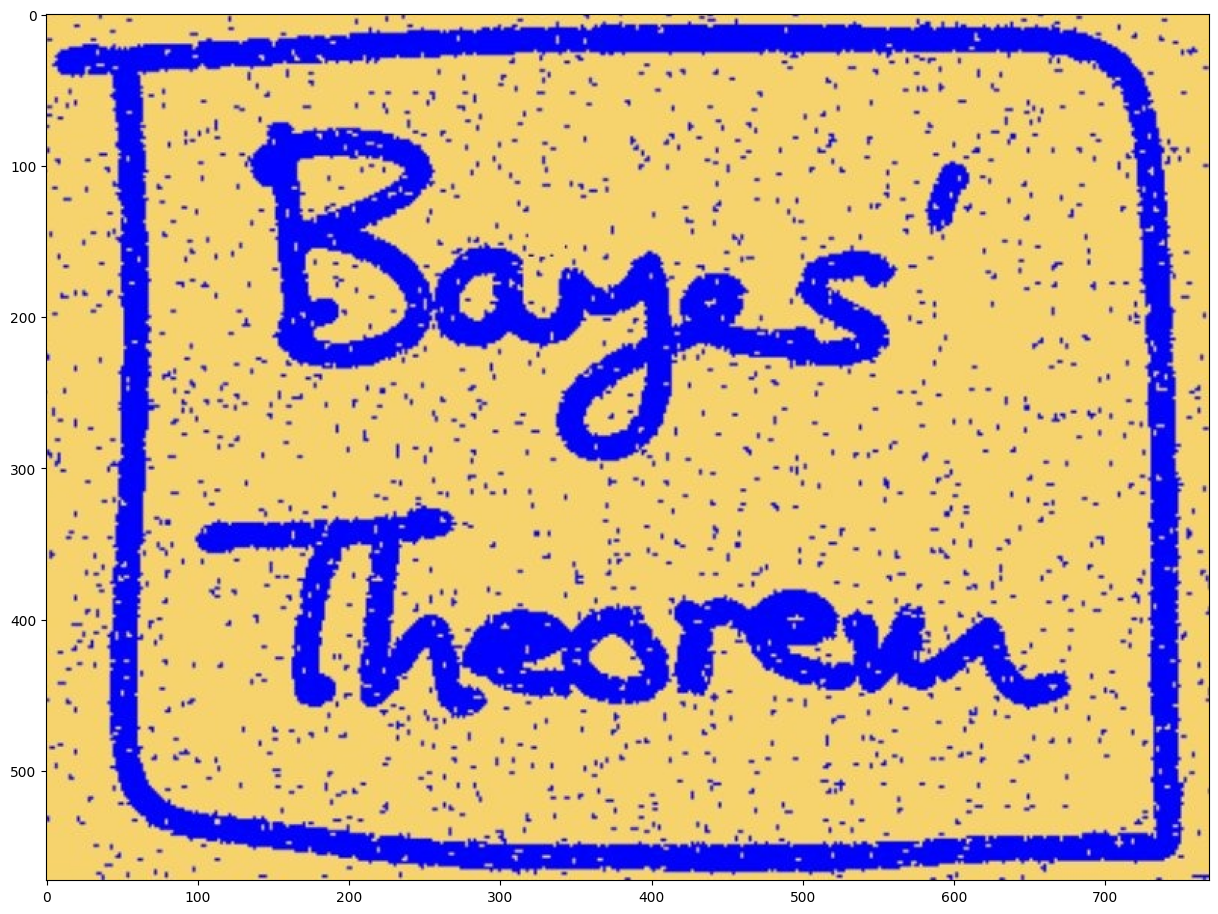

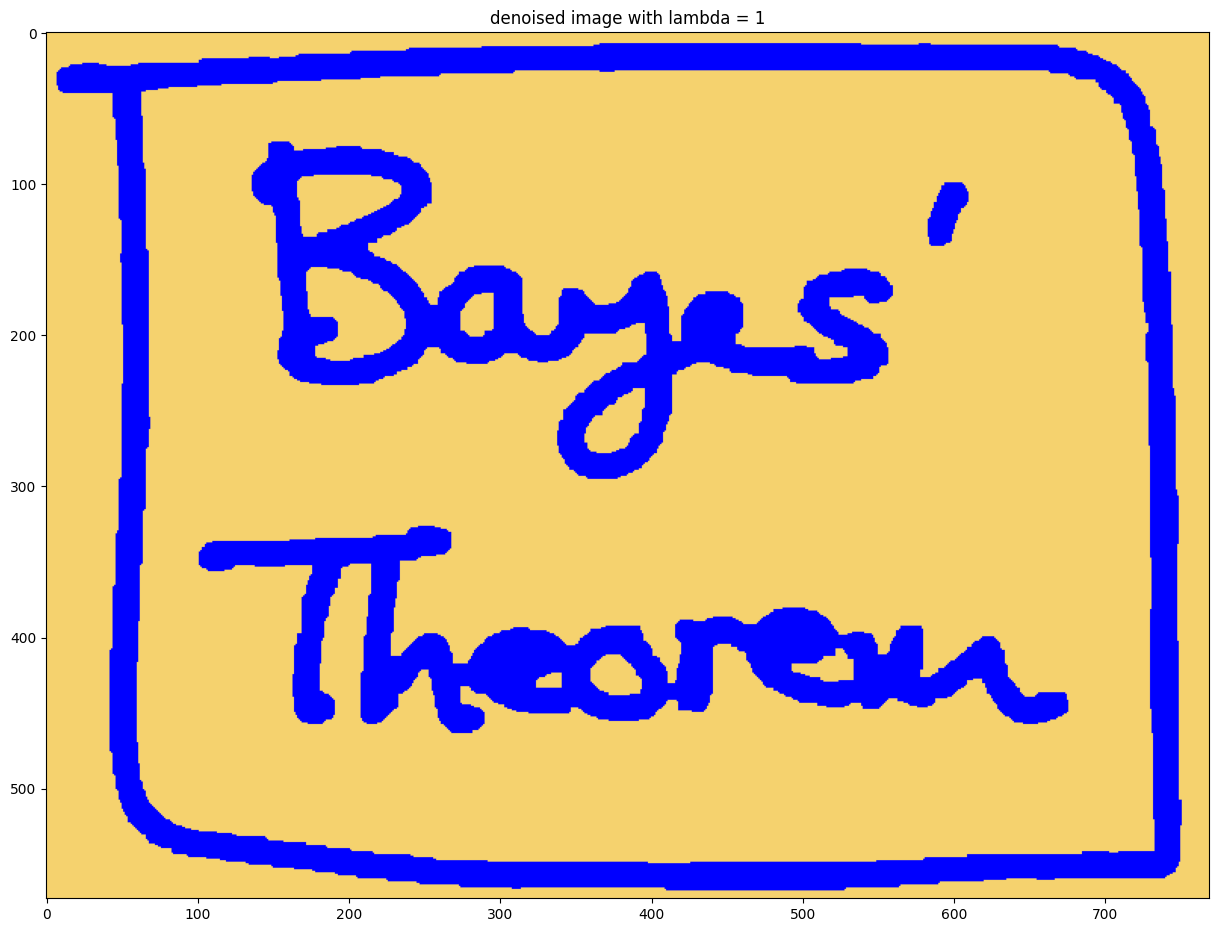

In [2]:
# foreground blue
fg = np.array([0,0,255])
# background yellow
bg = np.array([245,210,110])

im = cv2.imread('data/bayes_in.jpeg',cv2.IMREAD_COLOR)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

#show the original figure
plt.figure( figsize=(15,15) )
plt.imshow(im)
# distance
def dis(xi,xj):
    return np.sum(np.abs(xi - xj))/3/255
# generate nodes
def nodes(im,lmd,fg,bg):
    
    [row,col,c] = im.shape
    unary = np.zeros([row,col,2])
    for x in range(0,col):
        for y in range(0,row):

            # pixel color
            pc = im[y,x,:]

            # data term
            fdf = dis(pc,fg)
            fdb = dis(pc,bg)

            # prior term
            # right neighbor pixel
            fpr = 1
            # below neighbor pixel
            fpb = 1

            unary[y,x,0] = fdf + lmd*(fpr + fpb)
            unary[y,x,1] = fdb + lmd*(fpr + fpb)
    
    return unary

# graph cut
def gcut(unary,lmd):
    [row,col,c] = unary.shape
    smooth = 1 - np.eye(2)
    labels = gco.cut_grid_graph_simple(unary, smooth*lmd, n_iter=-1)
    labels = labels.reshape(row,col)
    return labels
# original iamge denoise
def dimage(im,labels):
    [row,col,c] = im.shape
    dim = np.zeros(im.shape)
    for i in range(0,row):
        for j in range(0,col):

            # background
            if labels[i,j] == 1:
                dim[i,j] = bg
            elif labels[i,j] == 0:
                dim[i,j] = fg

    return dim.astype(int)
# lambda = 1
lmd = 1
# nodes
unary = nodes(im,lmd,fg,bg)
# graphcut
label = gcut(unary,lmd)
# image denoising
dim = dimage(im,label)
#show the denoised figure
plt.figure( figsize=(15,15) )
plt.imshow(dim)   
plt.title('denoised image with lambda = %d'%lmd)